# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [7]:
# Your code here.

import pandas as pd

student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data.columns = ["Age","Tardies"]
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

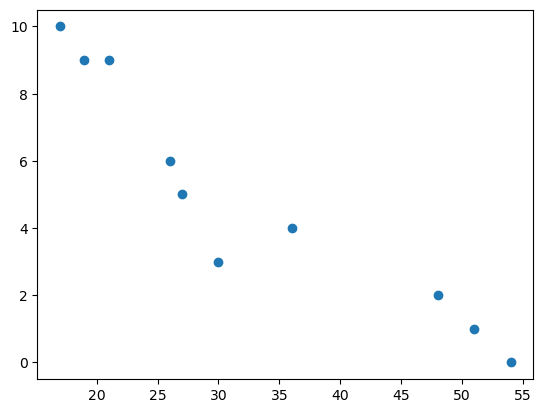

In [8]:
# Your code here.

import matplotlib.pyplot as plt


plt.scatter(student_data['Age'], student_data['Tardies'])
plt.show()



Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

"""
the younger the students are, the more often they are late to class

"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.

import numpy as np

#correlation:

print("Correlation: ",student_data["Age"].corr(student_data["Tardies"]))

#covariance:

print("Covariance: ",np.cov(student_data["Age"],student_data["Tardies"])[0][1])

Correlation:  -0.9391626886887122
Covariance:  -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here.

from sklearn import linear_model

model = linear_model.LinearRegression()

x = student_data[["Age"]]
y = student_data["Tardies"]

result = model.fit(x,y)


Plot your regression model on your scatter plot.

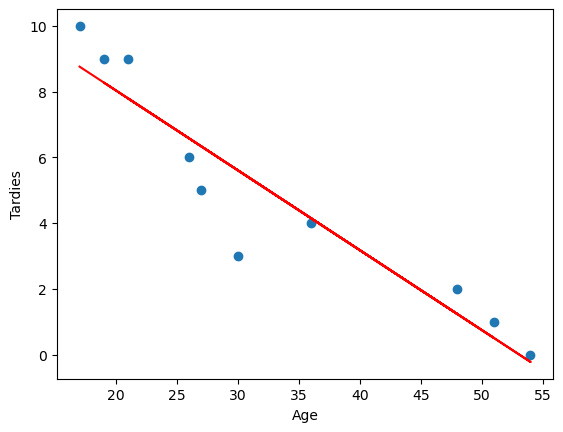

In [18]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x

plt.plot(x,regression_line, c= "red")
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [20]:
# Your response here. 

print("Score: ",model.score(x,y)) # the best score is 1
print("Intercept: ",result.intercept_)
print("Coefficient: ",result.coef_[0])

""" 
The linear regression confirms that age is that age is a good predictor of tardiness
"""


Score:  0.8820265558250109
Intercept:  12.888803363135771
Coefficient:  -0.2428207709159809


' \nThe linear regression confirms that age is that age is a good predictor of tardiness\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
# Import any libraries you may need & the data

from sklearn import linear_model
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = pd.read_csv("/Users/ricardomendes/Desktop/LABS/Week4/lab-regression-analysis/your-code/vehicles.csv")
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
# Your response here.

# Select the variables for analysis
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
data = data[variables]

# Calculate the correlations
correlations = data.corr()['CO2 Emission Grams/Mile'].sort_values()

print(correlations)


Combined MPG              -0.926229
Year                      -0.222300
Cylinders                  0.752393
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


In [ ]:
""" 
'Fuel Barrels/Year' is likely to be the most important variable in determining CO2 emissions,
 while 'Year' is the least important
 """

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
# Your response here. 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Select the variables for analysis
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
data = data[variables]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('CO2 Emission Grams/Mile', axis=1), 
                                                    data['CO2 Emission Grams/Mile'], test_size=0.2, 
                                                    random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('R-squared:', r2)


R-squared: 0.9794542628636334


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [20]:
# Your response here. 

variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
data = data[variables]

X_train, X_test, y_train, y_test = train_test_split(data.drop('CO2 Emission Grams/Mile', axis=1), 
                                                    data['CO2 Emission Grams/Mile'], test_size=0.2, 
                                                    random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)


print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)

print('R-squared:', r2)

Intercept: 755.6935073143338
Coefficients: [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
R-squared: 0.9794542628636334


In [ ]:
"""
From the coefficients, we can see that 'Fuel Barrels/Year' has the highest coefficient, which means 
it has the greatest impact on the CO2 emissions. 'Cylinders' also has a relatively high coefficient, 
indicating that it is an important variable in determining CO2 emissions. 'Combined MPG' and 'Year' 
have negative coefficients, indicating that as these variables increase, CO2 emissions decrease. 
'Fuel Cost/Year' has a positive coefficient, indicating that as fuel cost per year increases, CO2 emissions 
also increase.

Based on the high R-squared value, we can conclude that the linear regression model fits the data well 
and can make accurate predictions of CO2 emissions based on the selected variables. 
However, we should be cautious in drawing any causal conclusions from this model, as it is possible that
there are other variables that may also impact CO2 emissions but were not included in the analysis. 
Nonetheless, the model provides a useful tool for predicting CO2 emissions based on the selected variables.

"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
# Your code here.
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)
print(df)

    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

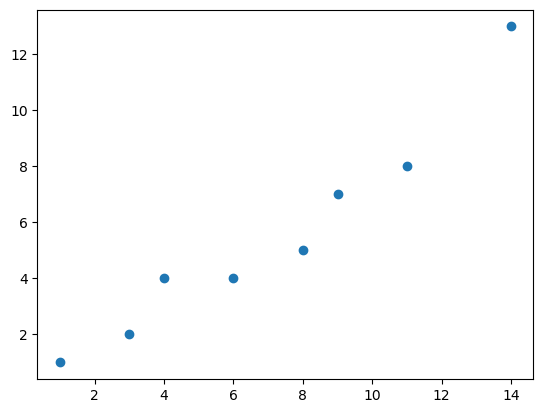

In [22]:
# Your code here.

plt.scatter(df['X'], df['Y'])
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [23]:
# Your response here. 
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['X'], df['Y'])

print(f"slope: {slope:.2f}, intercept: {intercept:.2f}, r_value: {r_value:.2f}")


slope: 0.85, intercept: -0.44, r_value: 0.97


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [26]:
# Your response here. 
from scipy.stats import zscore

df['Z_score_X'] = zscore(df['X'])
df['Z_score_Y'] = zscore(df['Y'])
df = df.loc[(df['Z_score_X'] < 3) & (df['Z_score_X'] > -3) & (df['Z_score_Y'] < 3) & (df['Z_score_Y'] > -3)]
df


,X,Y,Z_score_X,Z_score_Y
0,1,1,-1.477098,-1.260252
1,3,2,-0.984732,-0.980196
2,4,4,-0.738549,-0.420084
3,6,4,-0.246183,-0.420084
4,8,5,0.246183,-0.140028
5,9,7,0.492366,0.420084
6,11,8,0.984732,0.700140
7,14,13,1.723281,2.100420


In [27]:
slope, intercept, r_value, p_value, std_err = linregress(df['X'], df['Y'])

print(f"slope: {slope:.2f}, intercept: {intercept:.2f}, r_value: {r_value:.2f}")


slope: 0.85, intercept: -0.44, r_value: 0.97


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [22]:
# Your response here. 

print("Score: ",model.score(x,y))
print("Intercept: ",result.intercept_)
print("Coefficient: ",result.coef_[0])

"""
the model is better without the outlier
""" 


Score:  0.8820265558250109
Intercept:  12.888803363135771
Coefficient:  -0.2428207709159809


'\nthe model is better without the outlier\n'